In [18]:
#Importing necessary libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading the data after the web scrapping
df = pd.read_csv('all_quotes_cleaned.csv')
display(df.head(5))

,Author,Quote,Tags
0,Albert Einstein,The world as we have created it is a process o...,"change, deep-thoughts, thinking, world"
1,J.K. Rowling,"It is our choices, Harry, that show what we tr...","abilities, choices"
2,Albert Einstein,There are only two ways to live your life. One...,"inspirational, life, live, miracle, miracles"
3,Jane Austen,"The person, be it gentleman or lady, who has n...","aliteracy, books, classic, humor"
4,Marilyn Monroe,"Imperfection is beauty, madness is genius and ...","be-yourself, inspirational"


In [4]:
#Displaying the counts of missing values in the data
i=10
print('-'*i, 'checking for any missing values','-'*i)
display(df.isnull().value_counts())

#Checking for any duplicate values
print('-'*i, 'checking for any duplicate values','-'*i)
display(df.duplicated().value_counts())

#There are three missing values present in the data in the 'Tags' column
#There are no missing values present in the 'Author' and 'Quote' column
#There are no duplicate values in data
#There are 100 rows and 3 columns in the data

#Locating the missing data values
print('-'*i, 'Locating the missing data values', '-'*i)
display(df[df['Tags'].isnull().values == True])

---------- checking for any missing values ----------


Author  Quote  Tags 
False   False  False    97
               True      3
Name: count, dtype: int64

---------- checking for any duplicate values ----------


False    100
Name: count, dtype: int64

---------- Locating the missing data values ----------


,Author,Quote,Tags
27,J.K. Rowling,It is impossible to live without failing at so...,NaN
42,Marilyn Monroe,You believe lies so you eventually learn to tr...,NaN
78,Ayn Rand,The question isn't who is going to let me; it'...,NaN


In [5]:
#Replacing missing values with NA(not available)
df['Tags'] = df['Tags'].fillna('NA')

#Displaying the Author Name of the quotes
display(df['Author'].unique())

array(['Albert Einstein', 'J.K. Rowling', 'Jane Austen', 'Marilyn Monroe',
       'Andr Gide', 'Thomas A. Edison', 'Eleanor Roosevelt',
       'Steve Martin', 'Bob Marley', 'Dr. Seuss', 'Douglas Adams',
       'Elie Wiesel', 'Friedrich Nietzsche', 'Mark Twain',
       'Allen Saunders', 'Pablo Neruda', 'Ralph Waldo Emerson',
       'Mother Teresa', 'Garrison Keillor', 'Jim Henson',
       'Charles M. Schulz', 'William Nicholson', 'Jorge Luis Borges',
       'George Eliot', 'George R.R. Martin', 'C.S. Lewis',
       'Martin Luther King Jr.', 'James Baldwin', 'Haruki Murakami',
       'Alexandre Dumas fils', 'Stephenie Meyer', 'Ernest Hemingway',
       'Helen Keller', 'George Bernard Shaw', 'Charles Bukowski',
       'Suzanne Collins', 'J.R.R. Tolkien', 'Alfred Tennyson',
       'Terry Pratchett', 'J.D. Salinger', 'George Carlin', 'John Lennon',
       'W.C. Fields', 'Ayn Rand', 'Jimi Hendrix', 'J.M. Barrie',
       'E.E. Cummings', 'Khaled Hosseini', 'Harper Lee',
       "Madeleine L'En

In [6]:
#Exporting the csv file after the cleaning and replacing the values
df.to_csv('cleaned_data.csv', index=False)

print("Cleaned data exported to cleaned_data.csv")

Cleaned data exported to cleaned_data.csv


In [7]:
tag = []
for tag_str in df['Tags']:
    tag.append(list(map(str, tag_str.split(', '))))

def get_unique_values(tag):
    unique_values = set()
    for sublist in tag:
        unique_values.update(sublist)
    return list(unique_values)

unique_values = get_unique_values(tag)
#Printing the number of tags in the quotes
print(len(unique_values)-1)

137


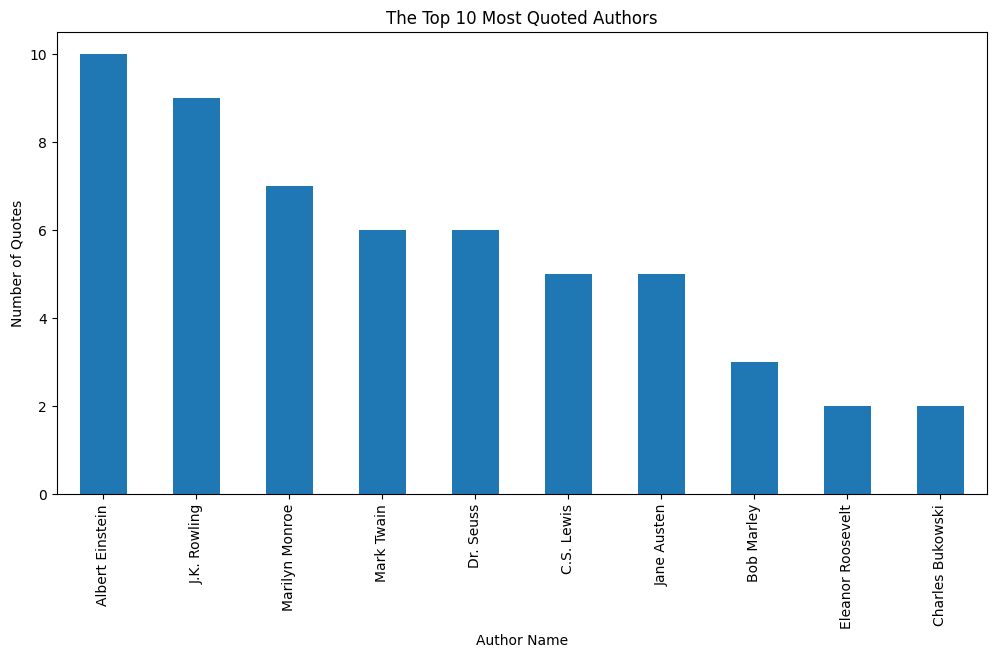

In [8]:
#Bar chart of the top 10 most quoted authors.
authors_count = df.groupby('Author').size().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
authors_count.head(10).plot(kind = 'bar')
plt.xlabel('Author Name')
plt.ylabel('Number of Quotes')
plt.xticks(rotation = 90)
plt.title('The Top 10 Most Quoted Authors')
plt.show()


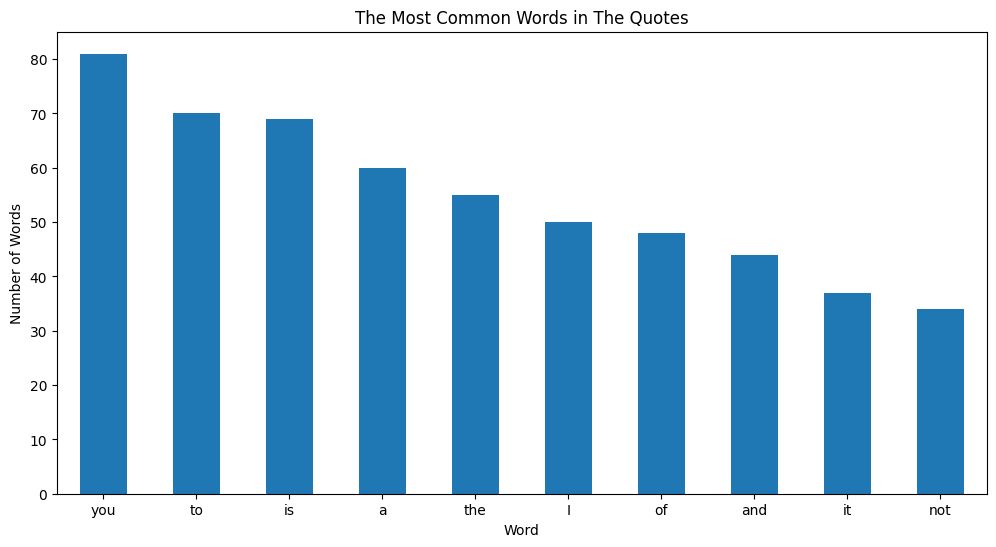

In [20]:
#Word cloud of the most common words in the quotes.
word_cloud = []

for quote_str in df['Quote']:
    word_cloud.append(list(map(str, quote_str.split(' '))))

#Coverting the list to list dataset to flattened list
flattened_word_cloud = [word for sublist in word_cloud for word in sublist]

def remove_special_characters(flattened_word_cloud):
    cleaned_list = []
    for text in flattened_word_cloud:
        # Remove characters that are not alphanumeric or spaces
        cleaned_text = re.sub(r"[^a-zA-Z0-9\s]", '', text)
        cleaned_list.append(cleaned_text)
    return cleaned_list


cleaned_list = remove_special_characters(flattened_word_cloud)

# Convert the flattened list into a pandas Series
word_series = pd.Series(cleaned_list)

# Use value_counts() to count the unique words
word_counts = word_series.value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
word_counts.head(10).plot(kind = 'bar')
plt.xlabel('Word')
plt.ylabel('Number of Words')
plt.xticks(rotation = 0)
plt.title('The Most Common Words in The Quotes')
plt.show()

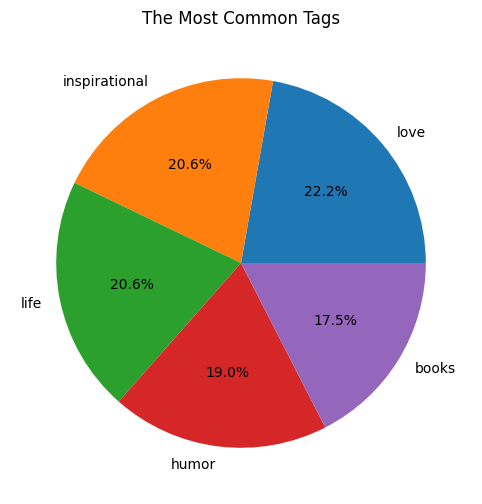

In [10]:
#Pie chart showing the proportion of top 5 tags.
tag = []
for tag_str in df['Tags']:
    tag.append(list(map(str, tag_str.split(', '))))

#Coverting the list to list dataset to flattened list
flattened_tag = [tag_str1 for sublist in tag for tag_str1 in sublist]

# Convert the flattened list into a pandas Series
tag_series = pd.Series(flattened_tag)

# Use value_counts() to count the unique words
tag_counts = tag_series.value_counts()

plt.figure(figsize=(12, 6))
tag_counts.head(5).plot(kind = 'pie', autopct='%1.1f%%')
plt.ylabel('')
#plt.xticks(rotation = 0)
plt.title('The Most Common Tags')
plt.show()


In [11]:
#The Quote with 0 tag
quote_0_tag = df[df['Tags'] == 'NA']
print('-'*i, 'The Quote with 0 tag', '-'*i)
display(quote_0_tag['Quote'])

##The Author with 0 tag
author_0_tag = df[df['Tags'] == 'NA']
print('-'*i, 'The Author with 0 tag', '-'*i)
display(author_0_tag['Author'])

---------- The Quote with 0 tag ----------


27    It is impossible to live without failing at so...
42    You believe lies so you eventually learn to tr...
78    The question isn't who is going to let me; it'...
Name: Quote, dtype: object

---------- The Author with 0 tag ----------


27      J.K. Rowling
42    Marilyn Monroe
78          Ayn Rand
Name: Author, dtype: object

In [12]:
#The total number of words used in the qutoes by all the Authors
print(f"The total number of words used in the qutoes by all the Authors are {len(word_series)}")


The total number of words used in the qutoes by all the Authors are 2363
